# 紫外-可见分光光度法 实验报告
**姓名:** 

**学号:** 

**组别:** 

**指导老师:** 

**日期:** 2025年11月14日

In [1]:
import numpy as np
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

config = {
    "font.family": "serif",
    "font.size": 12,
    "mathtext.fontset": "stix",
    "font.serif": ["SimSun"],
}
plt.rcParams.update(config)
# plt.rcParams['font.sans-serif'] = ['Hiragino Sans GB']  # macOS 原生中文字体
plt.rcParams['axes.unicode_minus'] = False         # 解决负号显示问题


In [2]:
csv_path = Path("./20251114A -UV(1)/20251114A/20251114A-UV.csv")

In [3]:
# 尝试几种常见编码读取
for enc in ("gbk", "gb2312", "utf-8-sig", "utf-8"):
    try:
        df = pd.read_csv(csv_path, encoding=enc)
        print("使用编码：", enc)
        break
    except Exception as e:
        last_err = e

display(df.head(8))
print("列总数：", df.shape[1])

使用编码： gbk


,基线 100%T,Unnamed: 1,苋菜红-4umol,Unnamed: 3,苋菜红-8umol,Unnamed: 5,苋菜红-12umol,Unnamed: 7,苋菜红-16umol,Unnamed: 9,...,孔雀石绿-20umol,Unnamed: 13,柠檬黄-20umol,Unnamed: 15,荧光素钠-20umol,Unnamed: 17,日落黄-20umol,Unnamed: 19,groupA-unknown,Unnamed: 21
0,波长 (nm),Abs,波长 (nm),Abs,波长 (nm),Abs,波长 (nm),Abs,波长 (nm),Abs,...,波长 (nm),Abs,波长 (nm),Abs,波长 (nm),Abs,波长 (nm),Abs,波长 (nm),Abs
1,800,-0.044529356,800,-7.88E-05,800,0.008654011,800,-0.00015446,800,-0.000269389,...,800,0.000740089,800,0.000549674,800,0.001376932,800,0.000337814,800,0.000665805
2,799,-0.044752046,799,-6.82E-05,799,0.008760603,799,-0.000276219,799,-0.000137277,...,799,0.000890406,799,0.000705733,799,0.001429158,799,0.000450727,799,0.000887708
3,798,-0.044842873,798,8.34E-05,798,0.008894038,798,-7.99E-05,798,-0.000158083,...,798,0.000868462,798,0.000638429,798,0.001377608,798,0.00042624,798,0.00074945
4,797,-0.045017984,797,-0.000115954,797,0.008837553,797,-0.000117144,797,-0.000208746,...,797,0.000844833,797,0.000726579,797,0.001364598,797,0.000433962,797,0.000752017
5,796,-0.045193162,796,9.84E-07,796,0.00875886,796,-0.00014768,796,-0.000225977,...,796,0.000842188,796,0.000613309,796,0.001376881,796,0.000480684,796,0.000767965
6,795,-0.045338701,795,-5.03E-05,795,0.008799301,795,-0.000249831,795,-0.000142194,...,795,0.000885996,795,0.000679365,795,0.001269853,795,0.000401185,795,0.000734955
7,794,-0.045518786,794,-1.13E-05,794,0.008882069,794,-0.000171176,794,-0.000194981,...,794,0.000890847,794,0.000755621,794,0.001318222,794,0.000444197,794,0.000810702


列总数： 22


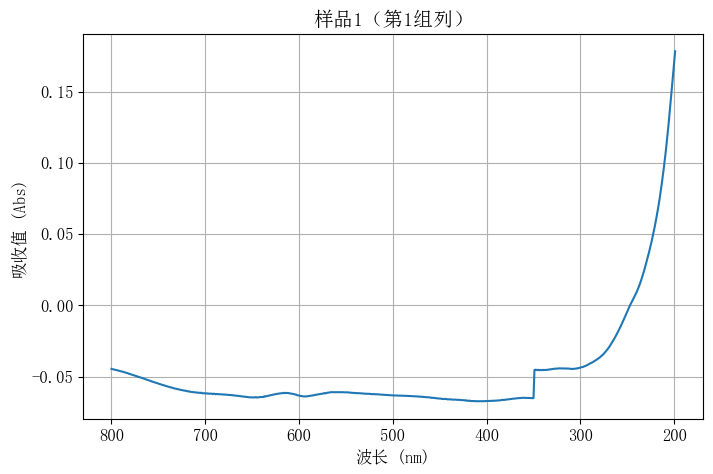

In [4]:
sub = df.iloc[:, [0, 1]].copy()
sub.columns = ["wavelength", "absorbance"]

# 第一行经常是文字（“波长 (nm) / Abs”），如果是，就丢掉
try:
    float(str(sub.iloc[0,0])); float(str(sub.iloc[0,1]))
    first_is_number = True
except:
    first_is_number = False

if not first_is_number:
    sub = sub.iloc[1:, :]

# 转成数值并清理缺失
sub["wavelength"] = pd.to_numeric(sub["wavelength"], errors="coerce")
sub["absorbance"] = pd.to_numeric(sub["absorbance"], errors="coerce")
sub = sub.dropna()

# 画图（UV 常用从高到低显示波长）
plt.figure(figsize=(8,5))
plt.plot(sub["wavelength"], sub["absorbance"], linewidth=1.5)
plt.title("样品1（第1组列）")
plt.xlabel("波长 (nm)")
plt.ylabel("吸收值 (Abs)")
plt.grid(True)
plt.gca().invert_xaxis()
plt.show()

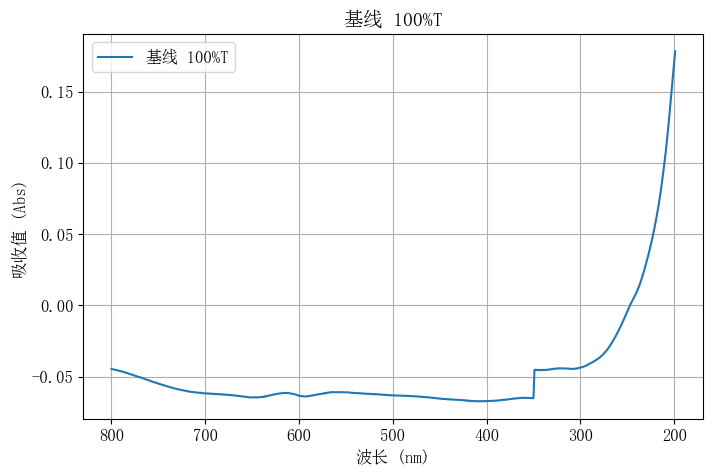

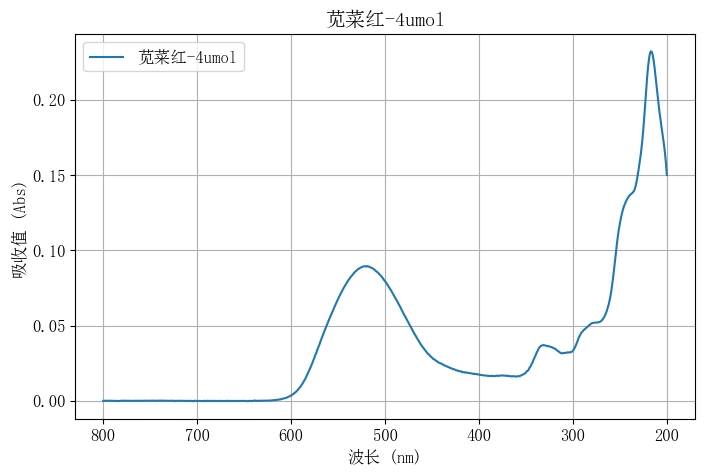

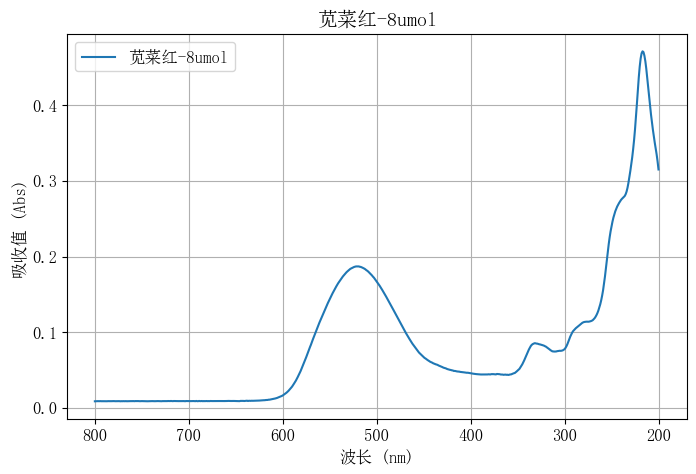

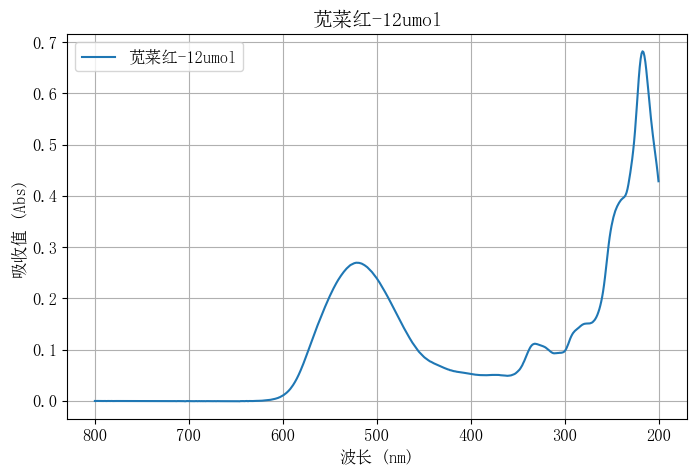

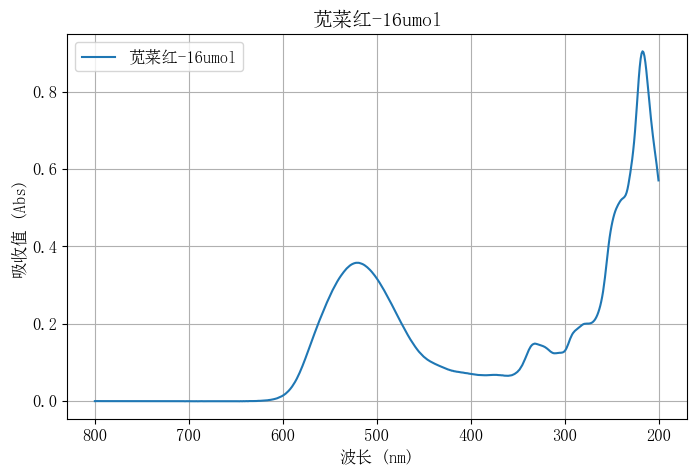

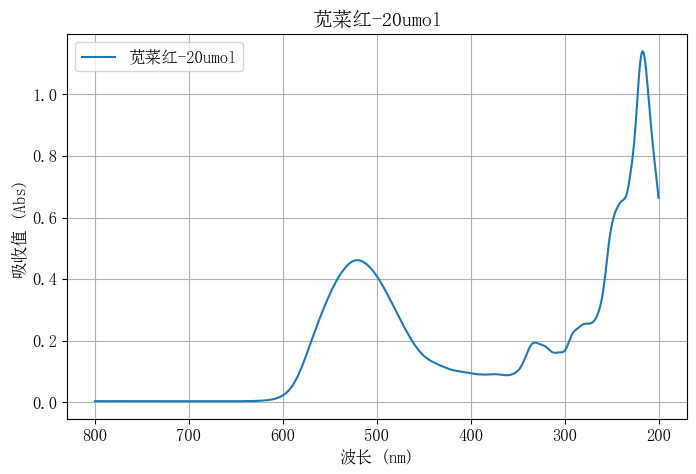

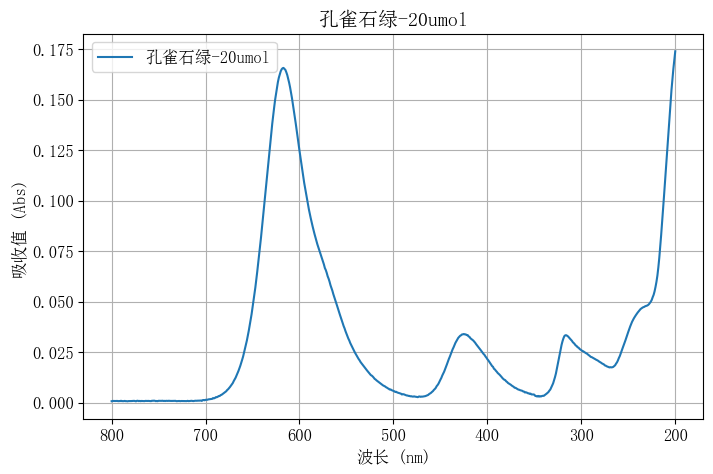

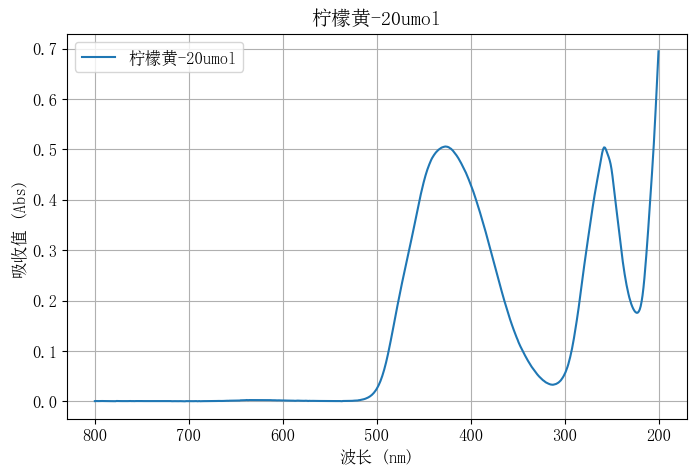

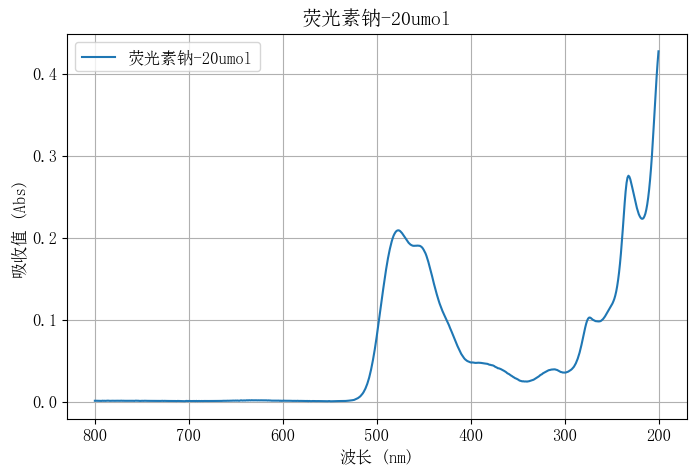

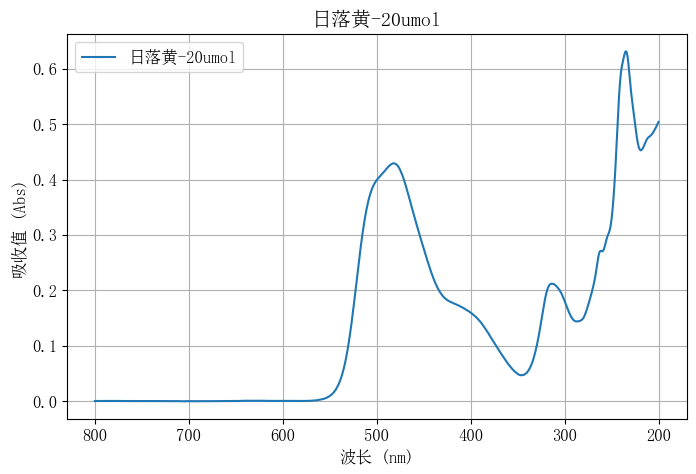

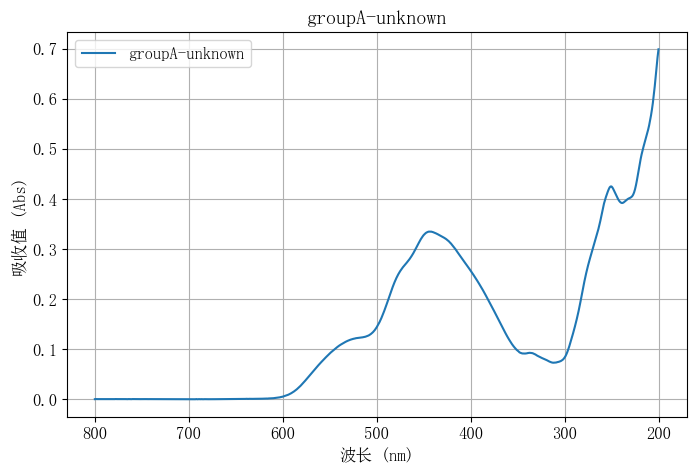

In [5]:
# 逐对列画图：第(0,1)、(2,3)、(4,5)……
n_cols = df.shape[1]
pairs = [(i, i+1) for i in range(0, n_cols-1, 2)]

for k, (a, b) in enumerate(pairs, start=1):
    sub = df.iloc[:, [a, b]].copy()
    sub.columns = ["wavelength", "absorbance"]

    # 去掉首行非数字
    try:
        float(str(sub.iloc[0,0])); float(str(sub.iloc[0,1]))
        first_is_number = True
    except:
        first_is_number = False
    if not first_is_number:
        sub = sub.iloc[1:, :]

    sub["wavelength"] = pd.to_numeric(sub["wavelength"], errors="coerce")
    sub["absorbance"] = pd.to_numeric(sub["absorbance"], errors="coerce")
    sub = sub.dropna()
    if sub.empty:
        continue

    # 用列名当作样品名（如果是 Unnamed 就用“样品k”）
    raw_name = str(df.columns[a])
    name = raw_name if not raw_name.startswith("Unnamed") else f"样品{k}"

    plt.figure(figsize=(8,5))
    plt.plot(sub["wavelength"], sub["absorbance"], linewidth=1.5, label=name)
    plt.title(name)
    plt.xlabel("波长 (nm)")
    plt.ylabel("吸收值 (Abs)")
    plt.grid(True)
    plt.gca().invert_xaxis()
    plt.legend()
    plt.show()

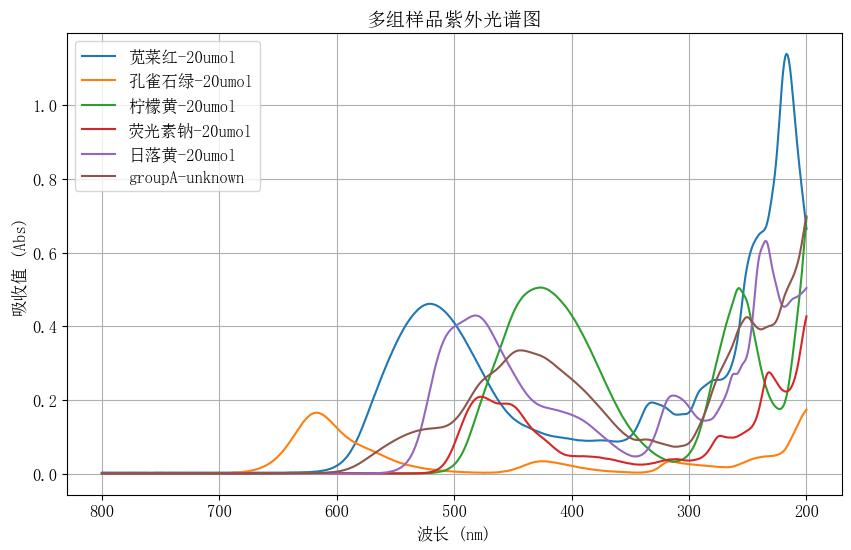

In [6]:
# 1. 读取数据
file = csv_path
df = pd.read_csv(file, encoding="gbk")

# 2. 每两列是一组（波长 / 吸收）
n_cols = df.shape[1]
pairs = [(i, i+1) for i in range(0, n_cols-1, 2)]

# 3. 创建画布
plt.figure(figsize=(10,6))

# 4. 循环绘制每组光谱
for k, (a, b) in enumerate(pairs[5:], start=1):
    sub = df.iloc[:, [a, b]].copy()
    sub.columns = ["波长", "吸收"]

    # 去掉第一行文字（如“波长 (nm)”）
    if not str(sub.iloc[0,0]).replace('.', '', 1).isdigit():
        sub = sub.iloc[1:,:]

    # 转成数值
    sub["波长"] = pd.to_numeric(sub["波长"], errors="coerce")
    sub["吸收"] = pd.to_numeric(sub["吸收"], errors="coerce")
    sub = sub.dropna()

    # 提取样品名（列名）
    name = str(df.columns[a])
    if name.startswith("Unnamed"):
        name = f"样品{k}"

    # 绘制
    plt.plot(sub["波长"], sub["吸收"], label=name, linewidth=1.5)

# 5. 美化图像
plt.title("多组样品紫外光谱图", fontsize=14)
plt.xlabel("波长 (nm)")
plt.ylabel("吸收值 (Abs)")
plt.legend()
plt.grid(True)
plt.gca().invert_xaxis()  # 紫外常用从高到低显示波长
plt.show()

In [7]:
# 这个列名后面其实还有一个对应的 Unnamed: 列（Abs）
# 我们只取那个 Abs 列：
y = pd.to_numeric(df["Unnamed: 21"], errors="coerce").dropna().values

print("向量长度：", len(y))
print("前10个数：", y[:10])

向量长度： 601
前10个数： [0.0006658  0.00088771 0.00074945 0.00075202 0.00076797 0.00073496
 0.0008107  0.00076607 0.00085632 0.00078697]


In [8]:
col_index = 21 # 可以改成想提取数据的列
y = pd.to_numeric(df.iloc[:, col_index], errors="coerce").dropna().values
print(y[:10])

[0.0006658  0.00088771 0.00074945 0.00075202 0.00076797 0.00073496
 0.0008107  0.00076607 0.00085632 0.00078697]


In [9]:
x = pd.to_numeric(df.iloc[:, 2], errors="coerce").dropna().values
y = pd.to_numeric(df.iloc[:, 3], errors="coerce").dropna().values

print("波长向量长度:", len(x))
print("吸收向量长度:", len(y))

波长向量长度: 601
吸收向量长度: 601


In [10]:
file1 = csv_path
df_new = pd.read_csv(file1, encoding="gbk")  # 或自动检测编码
df_new.head()

,基线 100%T,Unnamed: 1,苋菜红-4umol,Unnamed: 3,苋菜红-8umol,Unnamed: 5,苋菜红-12umol,Unnamed: 7,苋菜红-16umol,Unnamed: 9,...,孔雀石绿-20umol,Unnamed: 13,柠檬黄-20umol,Unnamed: 15,荧光素钠-20umol,Unnamed: 17,日落黄-20umol,Unnamed: 19,groupA-unknown,Unnamed: 21
0,波长 (nm),Abs,波长 (nm),Abs,波长 (nm),Abs,波长 (nm),Abs,波长 (nm),Abs,...,波长 (nm),Abs,波长 (nm),Abs,波长 (nm),Abs,波长 (nm),Abs,波长 (nm),Abs
1,800,-0.044529356,800,-7.88E-05,800,0.008654011,800,-0.00015446,800,-0.000269389,...,800,0.000740089,800,0.000549674,800,0.001376932,800,0.000337814,800,0.000665805
2,799,-0.044752046,799,-6.82E-05,799,0.008760603,799,-0.000276219,799,-0.000137277,...,799,0.000890406,799,0.000705733,799,0.001429158,799,0.000450727,799,0.000887708
3,798,-0.044842873,798,8.34E-05,798,0.008894038,798,-7.99E-05,798,-0.000158083,...,798,0.000868462,798,0.000638429,798,0.001377608,798,0.00042624,798,0.00074945
4,797,-0.045017984,797,-0.000115954,797,0.008837553,797,-0.000117144,797,-0.000208746,...,797,0.000844833,797,0.000726579,797,0.001364598,797,0.000433962,797,0.000752017


[-7.88000e-05 -6.82000e-05  8.34000e-05 -1.15954e-04  9.84000e-07
 -5.03000e-05 -1.13000e-05  6.32000e-05  5.72000e-05 -8.77000e-05]
[0.0006658  0.00088771 0.00074945 0.00075202 0.00076797 0.00073496
 0.0008107  0.00076607 0.00085632 0.00078697]


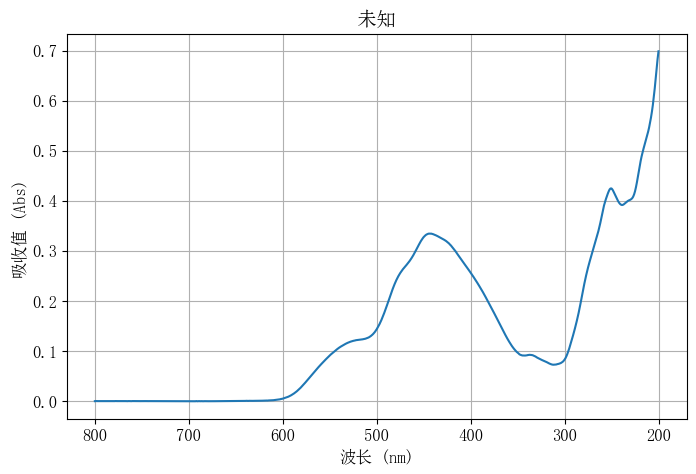

In [11]:
col_index1 = 2 
col_index2 = 21
x = pd.to_numeric(df_new.iloc[:, col_index1], errors="coerce").dropna().values
print(y[:10])
col_index = 21
y = pd.to_numeric(df_new.iloc[:, col_index2], errors="coerce").dropna().values
print(y[:10])


sub = sub.dropna()

# 画图（UV 常用从高到低显示波长）
plt.figure(figsize=(8,5))
plt.plot(x, y, linewidth=1.5)
plt.title("未知")
plt.xlabel("波长 (nm)")
plt.ylabel("吸收值 (Abs)")
plt.grid(True)
plt.gca().invert_xaxis()
plt.show()

---
### 验证苋菜红溶液吸光度与浓度的线性关系

intercept = 0.011433
slope = 0.056226
r = 0.999803
p-value = 3.308648e-06
std_err = 6.437746e-04


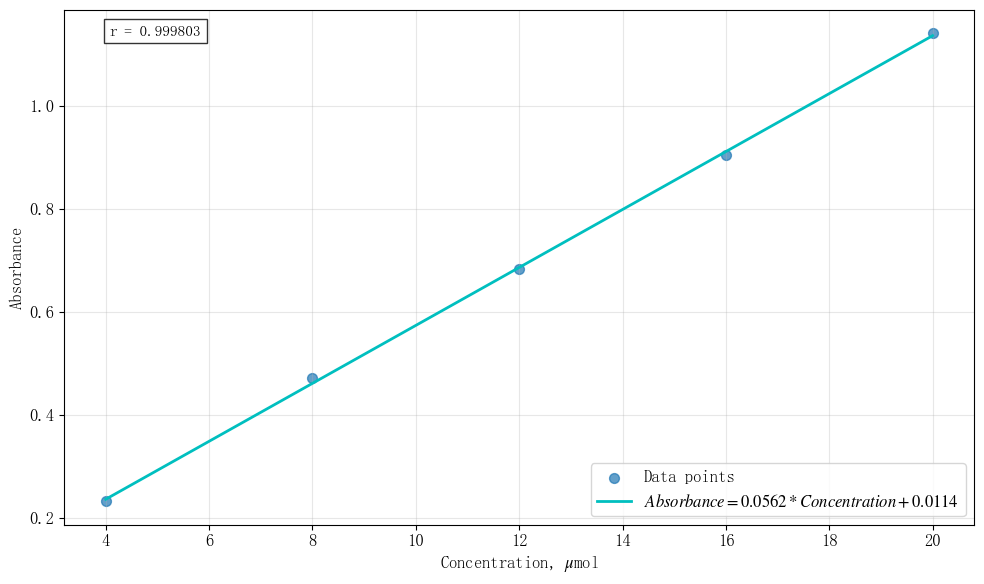

In [12]:
def linear_regression(concentration, absorbance) -> None:
    """
    Summary:
        一个简单的线性回归，绘制结果图表
    Args:
        concentration (np.ndarray): 浓度数据
        absorbance (np.ndarray): 吸光度数据
    """
    
    slope, intercept, r_value, p_value, std_err = stats.linregress(concentration, absorbance)

    line = slope * concentration + intercept

    plt.figure(figsize=(10, 6))
    plt.scatter(concentration, absorbance, s=50, alpha=0.7, label='Data points')
    plt.plot(concentration, line, 'c-', linewidth=2, label=rf'$Absorbance = {slope:.4f} * Concentration + {intercept:.4f}$')
    plt.xlabel(r'Concentration, $\mu$mol', fontsize=12)
    plt.ylabel(r'Absorbance', fontsize=12)
    plt.legend()

    plt.text(0.05, 0.95, f'r = {r_value:.6f}', 
            transform=plt.gca().transAxes, 
            fontsize=11,
            bbox=dict(facecolor='white', alpha=0.8))

    print(rf'intercept = {intercept:.6f}')
    print(rf'slope = {slope:.6f}')
    print(rf'r = {r_value:.6f}')
    print(rf'p-value = {p_value:.6e}')
    print(rf'std_err = {std_err:.6e}')

    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

concentration = np.array([4, 8, 12, 16, 20])
absorbance = np.array([0.232292265, 0.471440256, 0.682269692, 0.90439409, 1.140339732]) # 取217nm（最大吸收）的吸光值
linear_regression(concentration, absorbance)


线性回归分析的r=0.999803，表明苋菜红在该浓度范围内的吸光度与浓度之间具有极强的线性关系，符合朗伯-比尔定律。这验证了实验的准确性，也表明以此为标准溶液的吸光度可以可靠地用于推断其浓度。

### 将已经测量的各色素的光谱作为标准光谱，计算各色素在混合样品中的含量
已知各色素的标准光谱数据（吸光度随波长变化的数据），以及混合样品的光谱数据；并且知道混合样品是3种已知的色素混合的。接下来采用线性回归的方法，计算各色素在混合样品中的含量。
>不采用原本的正交化矩阵方法或者投影法的原因: 

>这两种方法都要求各个色素的光谱是线性无关的，如果光谱存在重叠的部分，虽然这样的方法可以得到一组正交基和组合系数，但是由于光谱本身不正交，这组正交基并不是实际上的光谱本身，从而没有任何物理意义。而实际测量中，色素的光谱往往会有重叠，从而影响计算结果的准确性。

>然而采用线性回归可以直接使用原始的光谱数据进行拟合，从而避免了正交化带来的误差，这种方法也是符合朗伯-比尔定律的，具有物理意义。

系数向量: [ 0.27126584 -0.00891778  0.49945333  0.42672352 -0.02720454]
残差平方和: 0.002077878643281155
归一化系数: 1.1613203780868055
苋菜红(Amaranth Red): 23.36%
孔雀石绿(Melachite Green): -0.77%
柠檬黄(Lemon Yellow): 43.01%
荧光素钠(Fluorescein Sodium): 36.74%
日落黄(Sunset Yellow): -2.34%


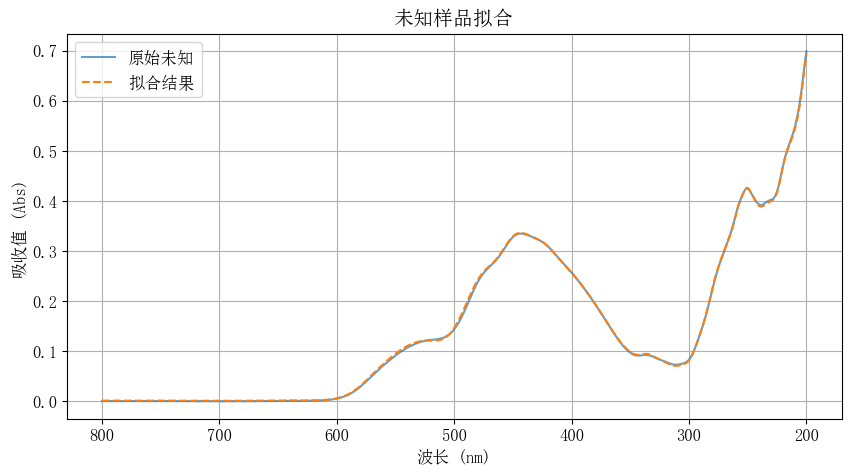

In [13]:
# 每列是一个标准光谱
a_amaranth = pd.to_numeric(df["Unnamed: 11"], errors="coerce").dropna().values
a_melachite = pd.to_numeric(df["Unnamed: 13"], errors="coerce").dropna().values
a_lemon = pd.to_numeric(df["Unnamed: 15"], errors="coerce").dropna().values
a_fluorescein = pd.to_numeric(df["Unnamed: 17"], errors="coerce").dropna().values
a_sunset = pd.to_numeric(df["Unnamed: 19"], errors="coerce").dropna().values
A = np.column_stack([a_amaranth, a_melachite, a_lemon, a_fluorescein, a_sunset])  # 把各列的光谱值拼合为矩阵

# 获取线性拟合的系数。lstsq的返回包含四个部分：回归系数，残差平方和，秩，奇异值
coefficients, residuals, rank, s = np.linalg.lstsq(A, y, rcond=None)

print(f'系数向量: {coefficients}')
print("残差平方和:", residuals[0])

print(f'归一化系数: {np.sum(coefficients)}')
coefficients_norm = coefficients / np.sum(coefficients)

print(f'苋菜红(Amaranth Red): {coefficients_norm[0] * 100:.2f}%')
print(f"孔雀石绿(Melachite Green): {coefficients_norm[1] * 100:.2f}%")
print(f"柠檬黄(Lemon Yellow): {coefficients_norm[2] * 100:.2f}%")
print(f"荧光素钠(Fluorescein Sodium): {coefficients_norm[3] * 100:.2f}%")
print(f"日落黄(Sunset Yellow): {coefficients_norm[4] * 100:.2f}%")

# 计算拟合后的光谱
new_y = A @ coefficients  # 等价于 c1*a_amaranth + c2*a_melachite + ...

# 绘图
plt.figure(figsize=(10,5))
plt.plot(x, y, label="原始未知", linewidth=1.5, alpha=0.7)
plt.plot(x, new_y, label="拟合结果", linewidth=1.5, linestyle="--")
plt.title(f"未知样品拟合")
plt.xlabel("波长 (nm)")
plt.ylabel("吸收值 (Abs)")
plt.legend()
plt.grid(True)
plt.gca().invert_xaxis()
plt.show()

### 结果与讨论

#### 1. 线性回归分析验证
通过对苋菜红标准溶液在不同浓度下的吸光度进行线性回归分析，我们得到了极高的相关系数 ($r \approx 0.9998$)。这一结果有力地验证了在实验浓度范围内，吸光度与浓度严格遵循朗伯-比尔定律（Lambert-Beer Law）。这为后续利用吸光度反推混合物中各组分含量提供了坚实的理论基础和数据支持。

#### 2. 混合样品成分分析
利用最小二乘法（Least Squares Method）对未知混合样品的光谱进行了拟合分析，结果已经在上一个代码块的输出中体现。
*   **拟合效果**：从“未知样品拟合”图中可以看出，拟合曲线（虚线）与原始测量光谱（实线）在主要特征峰位置高度重合，残差平方和很小，说明线性叠加模型能够很好地解释混合样品的光谱特征。
*   **成分构成**：根据计算出的归一化系数，我们可以推断该未知样品主要由**苋菜红**、**柠檬黄**和**荧光素钠**组成（具体比例参考上方代码输出的百分比）。
*   **微量成分与误差**：计算结果中出现的极小负值或接近零的系数（如孔雀石绿或日落黄），在物理意义上应视为该成分不存在或含量低于检测限。这可能是由于测量噪声、基线漂移或各色素光谱间的微弱非线性干扰导致的计算误差。

#### 3. 方法评价
本实验采用的全光谱线性拟合方法优于单波长法。它利用了整个波段的信息，有效克服了多组分光谱重叠带来的干扰，无需进行复杂的物理分离即可实现混合物的定量分析。该方法简单、快速且准确度高，适用于多组分色素混合体系的快速检测。